**0. Introduction** <br> <br>
We aim to answer two main questions:

- How has actor diversity evolved over time based on attributes such as gender, ethnicity, height, and age at the time of a movie’s release, and what trends in diversity can be observed across different countries?

- How have stereotypical roles or archetypes in films changed over time, and how are specific attributes (e.g., gender, ethnicity) linked to character roles? Furthermore, have these patterns shifted over time and across different cultures?



**1. Preprocessing**

The prepocessing of metadata was done based to our observation of the diverse datasets. To do this, we removed the aberrant values, we translated the WikiData IDs and removed the NaNs.

In [1]:
# Formating the orignal datatset
from src.scripts.formating import formating_datasets
import pandas as pd

# Running the formating of the original dataset
formating_datasets()
# To add headers and convert the datasets in csv 

/Users/lou/Documents/GitHub/ada-2024-project-microbiotaandco
The character metadata is formated.
The movie metadata is formated.
The name cluster is formated.
The plot summaries is metadata is formated.
The TV tropes clusters is formated.


In [2]:
# Prepocessing
from src.scripts.preprocessing import preprocessing_datasets

preprocessing_datasets()

/Users/lou/Documents/GitHub/ada-2024-project-microbiotaandco
Creation of the compact dataset...


ERROR:tornado.application:Exception in callback functools.partial(<bound method OutStream._flush of <ipykernel.iostream.OutStream object at 0x1085d2ce0>>)
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/jupyter_client/session.py", line 100, in json_packer
    ).encode("utf8", errors="surrogateescape")
      ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
UnicodeEncodeError: 'utf-8' codec can't encode characters in position 58-69: surrogates not allowed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/tornado/ioloop.py", line 750, in _run_callback
    ret = callback()
          ^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/ipykernel/iostream.py", line 618, in _flush
    self.session.send(
  File "/opt/anaconda3/lib/python3.12/site-packages/jupyter_client/session.py", line 852, in send
    to_send = self.serialize(msg, ident)
       

done.
Creation of the exploded dataset...
done.


For the second question, the main issue was that the dataset tvtropes_clusters.csv contained only 502 lines, which was too small to be used effectively for analyzing roles or archetypes. As a result, we needed to obtain new data that would include such roles or archetypes.

To achieve this, we used the SPARQL endpoint API of Wikidata. By using Python code, we were able to send a SPARQL query that contained a Freebase ID for each character. This allowed us to obtain detailed information related to each character, including their associated occupations.

We collected the new data and stored it in a dataset called extract_data.csv, which included a new column named "Occupation Labels". This column contained a list of occupations related to each character. For example, Batman had multiple occupations, such as businessman, superhero, and more.

Finally, this new dataset was cleaned and processed using similar methods as for the first question. The data was normalized, duplicates were removed, and missing values were handled, resulting in a more complete and structured dataset for further analysis.

**2. Exploratory Data Analysis**

Actor Gender
M    16317
F     8084
Name: count, dtype: int64


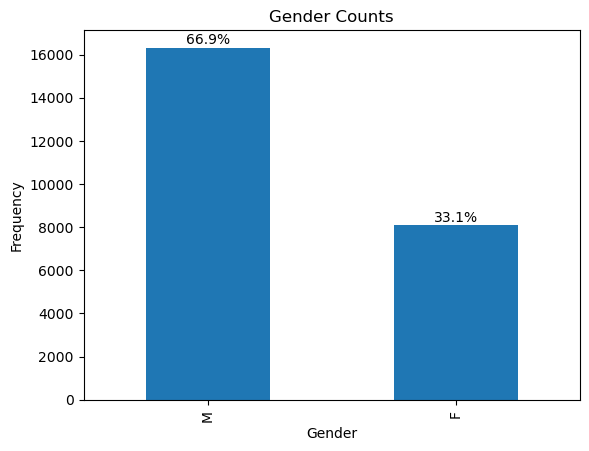

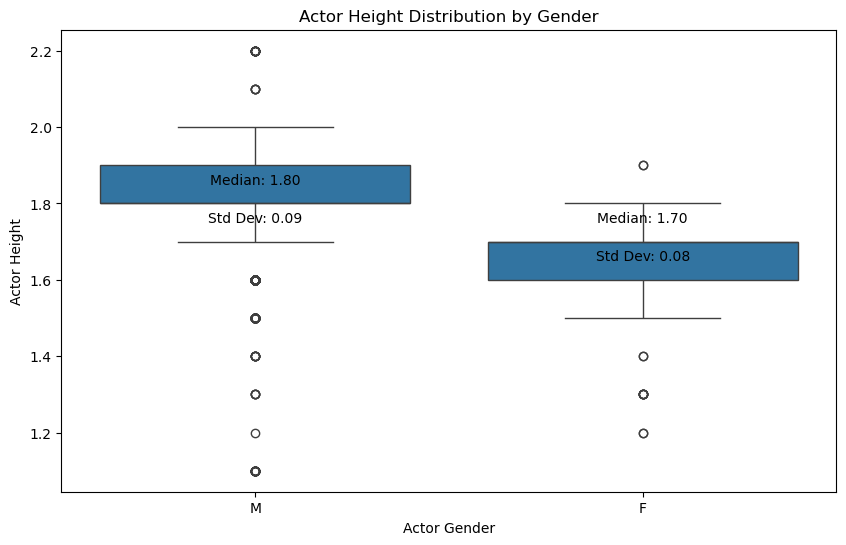

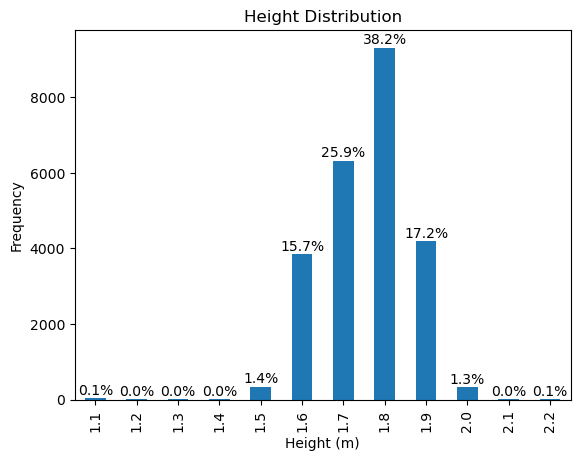

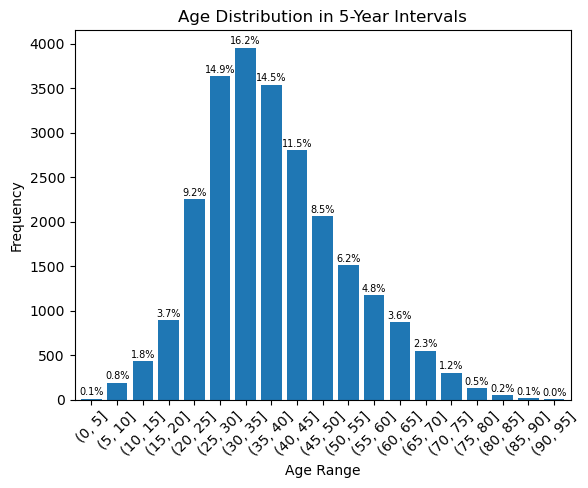

                    Count
Ethnicity                
African Americans    3267
Italians              166
European Americans   8372
Taiwanese               8
Jewish               3210
...                   ...
African Guyanese        1
Singapourians           1
Bosnians                1
Cubans                  1
Haitian Americans       1

[131 rows x 1 columns]


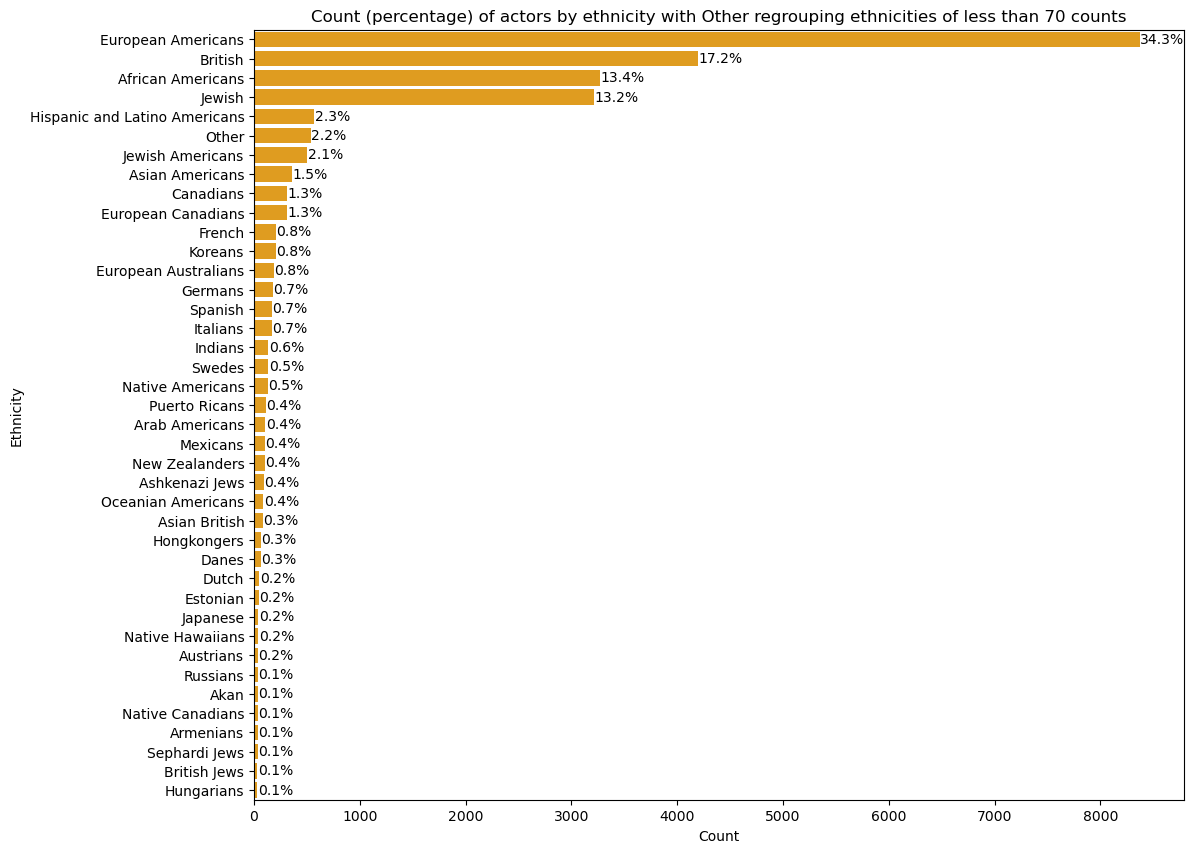

                          Count
Country                        
United States of America  13307
Italy                       170
Taiwan                        8
Jewish                     3201
Korea                       203
...                         ...
Greeland                     10
China                         1
Guyana                        1
Bosnia                        1
Cuban                         1

[112 rows x 1 columns]


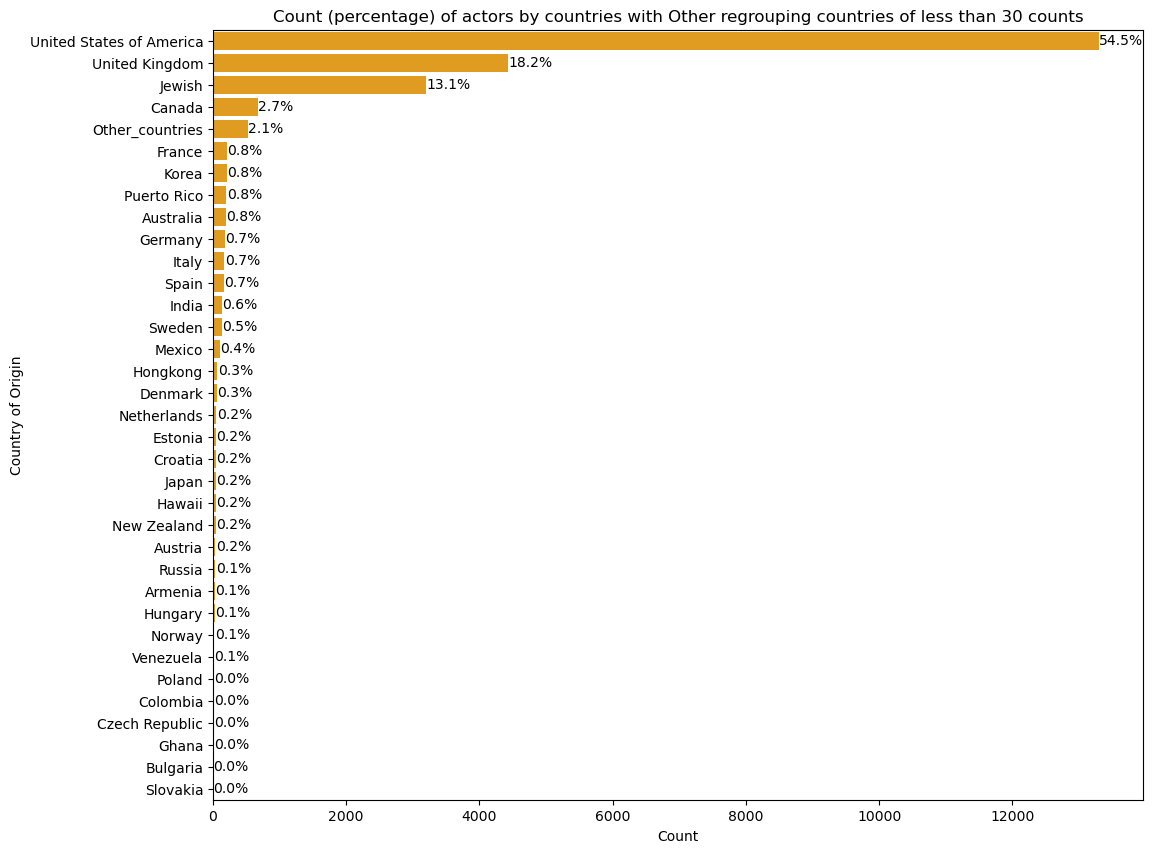

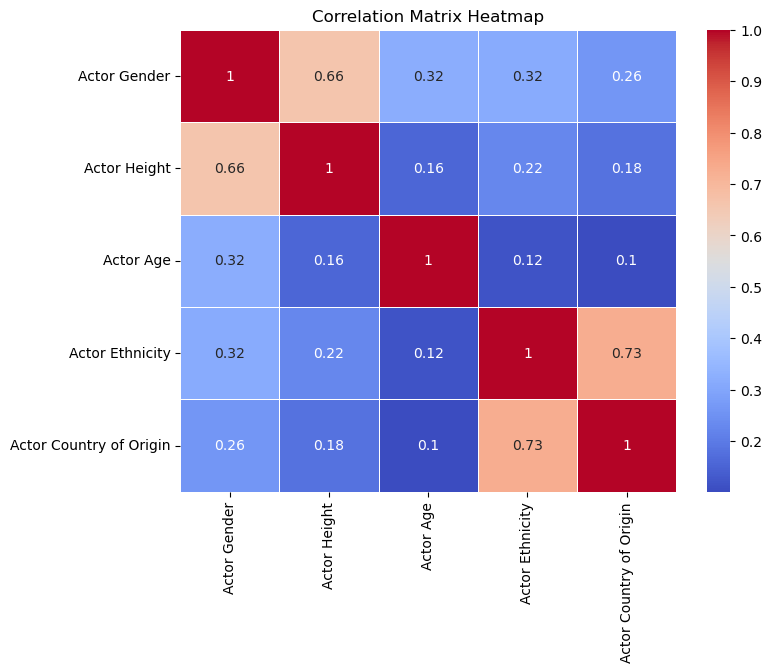

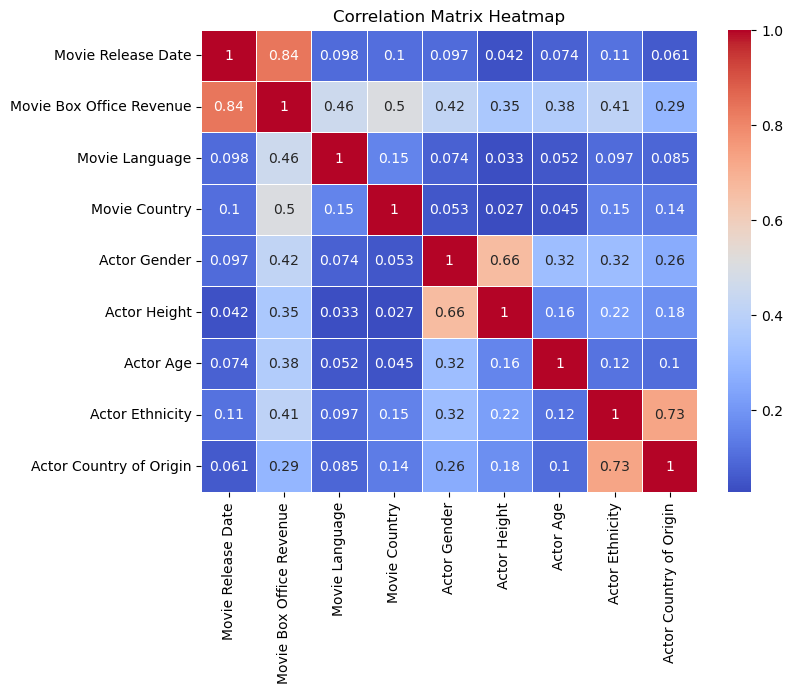

In [3]:
import src.scripts.preliminary_analysis_2

- Gender-Height: Moderate to strong association between gender and height. Indicates a relationship, likely because certain heights are more common in different genders.
- Gender-Ethnicity: Weak association between gender and ethnicity. There is some relationship, but it’s not very strong.
- Gender-Age: Weak association between gender and age at movie release. There’s some correlation but it’s not strong.
- Height-Ethnicity: Weak association between height and ethnicity. Certain heights might be more common in some ethnic groups, but the relationship is weak.
- Height-Age: Almost no association between height and age at movie release. This suggests these two variables are largely independent of each other.
- Ethnicity-Age: Almost no association between ethnicity and age at movie release. These two variables don’t seem to affect each other.
- Revenue-Date: Strong association.

For the second question, we first wanted to examine whether ending up with only 5,831 rows has introduced any bias. For example, it’s possible that Wikidata mostly includes Freebase IDs for male characters. The following plots suggest that the distributions of different characteristics do not change drastically. 

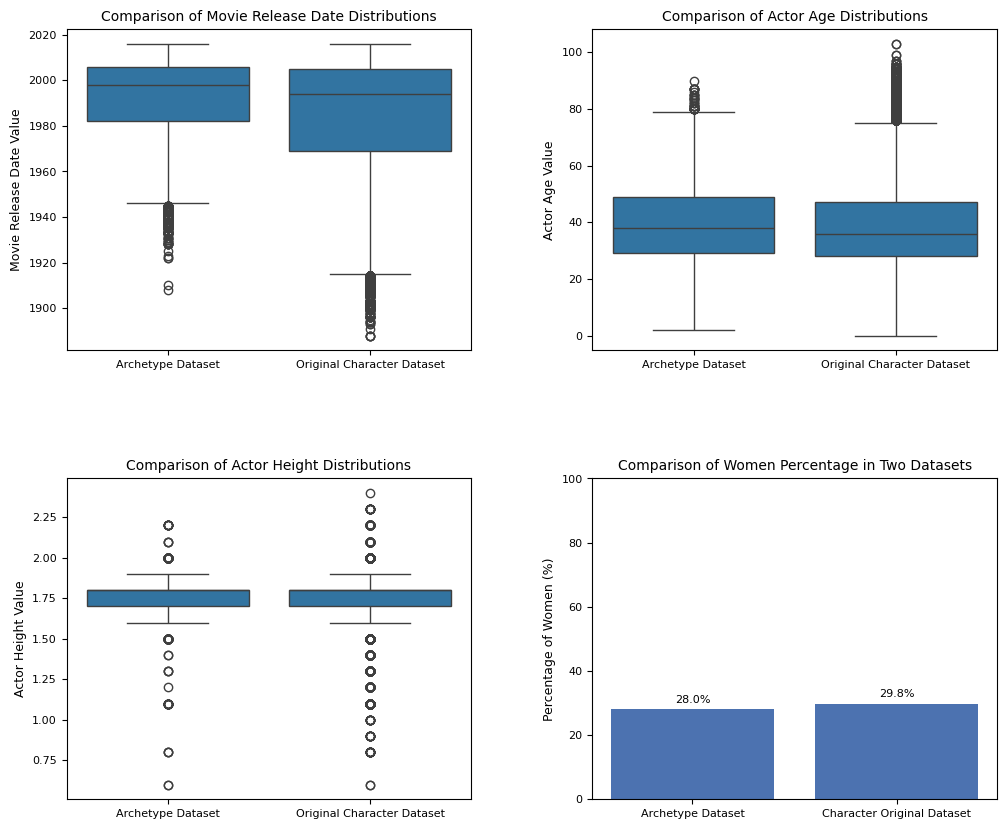

In [4]:
import src.scripts.plot_data_comparison

Results of the archetype analysis:

Gender in different archetypes:


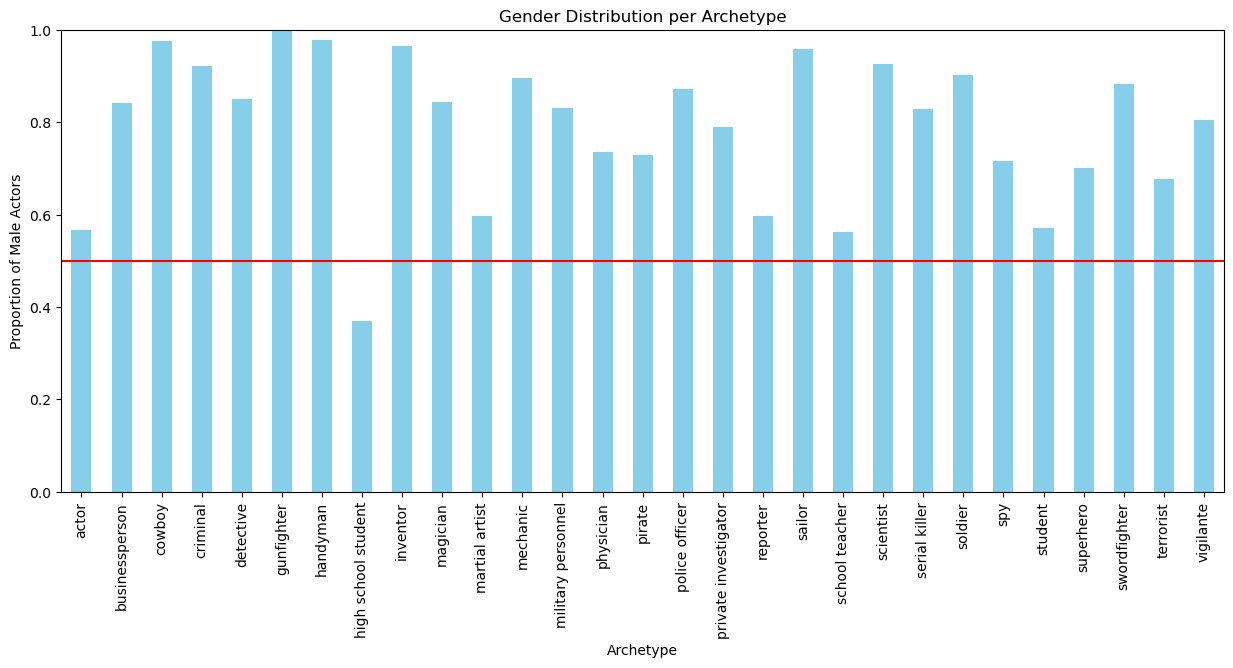

Gender statistics:
Chi-square test statistic: 1597.931753249202
p-value: 0.0
Degrees of freedom: 29
There is a statistically significant gender bias by archetype (reject null hypothesis).

Height in different archetypes:


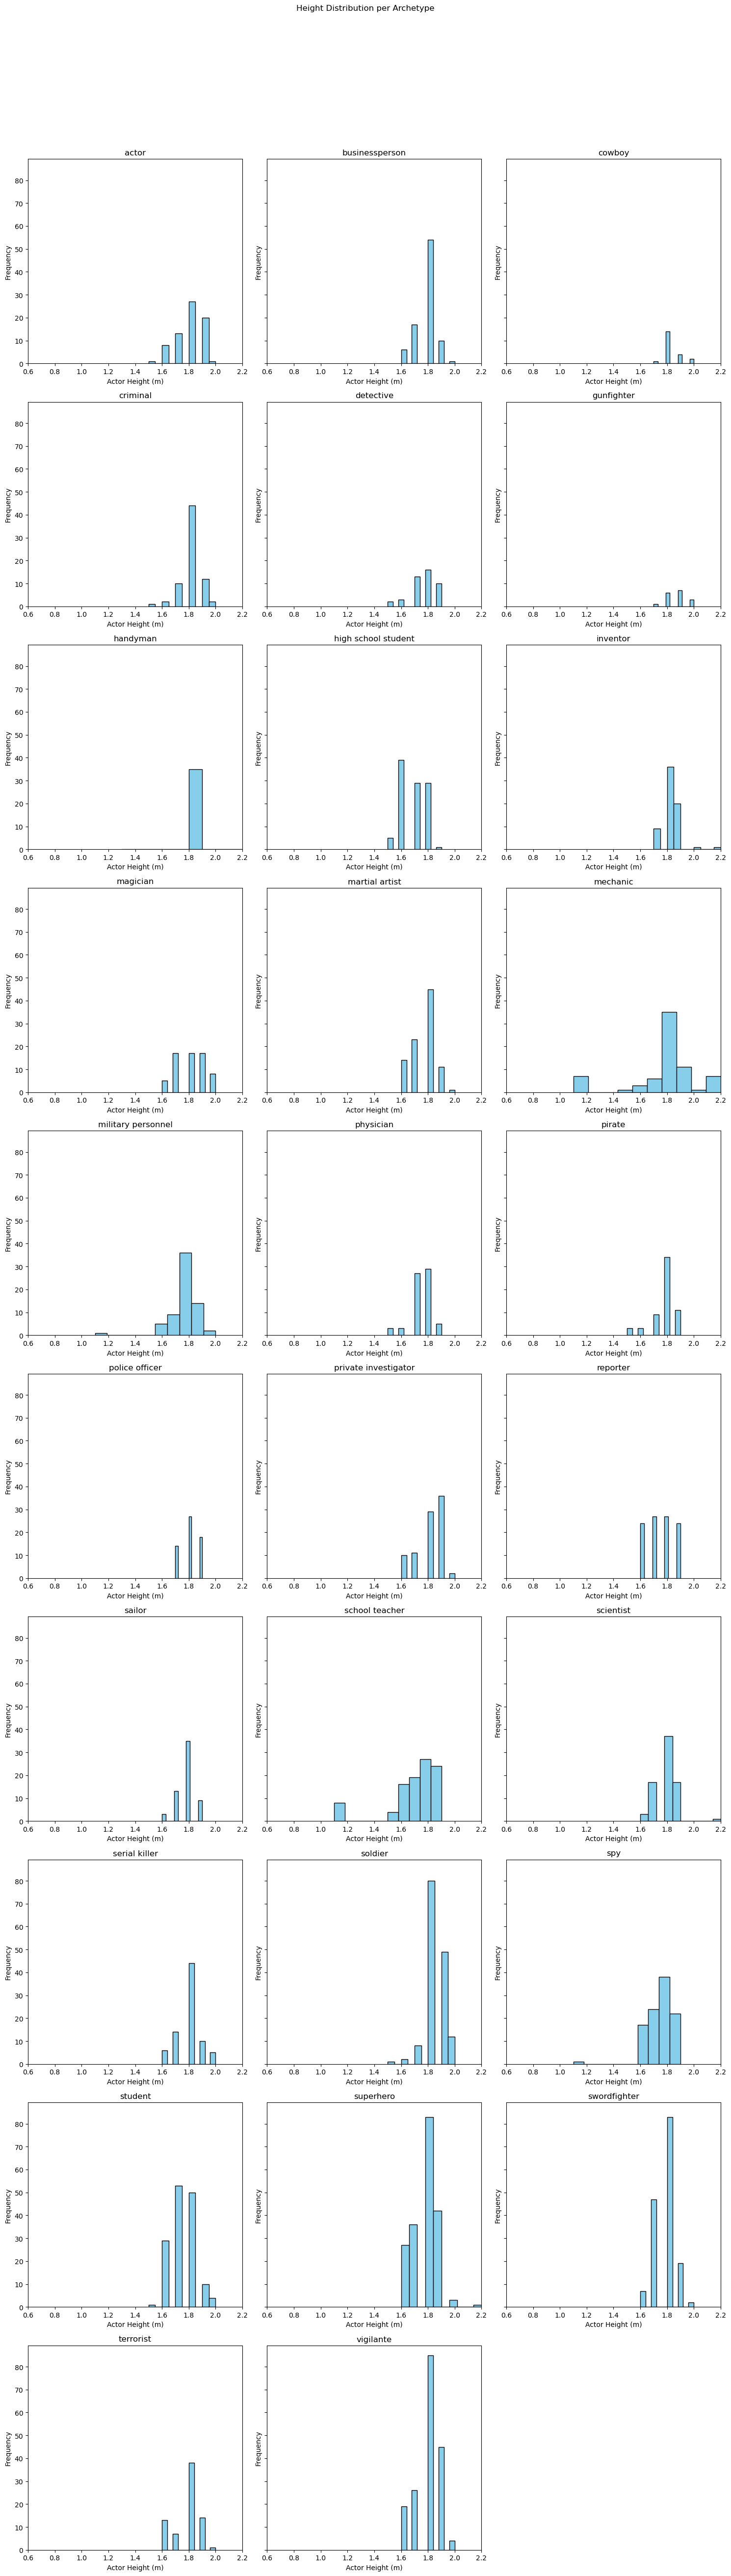

Height statistics:
Chi-square test statistic: 997.7845270353575
p-value: 1.4157778069604167e-107
Degrees of freedom: 196
There is a statistically significant height bias by archetype (reject null hypothesis).

Age in different archetypes:


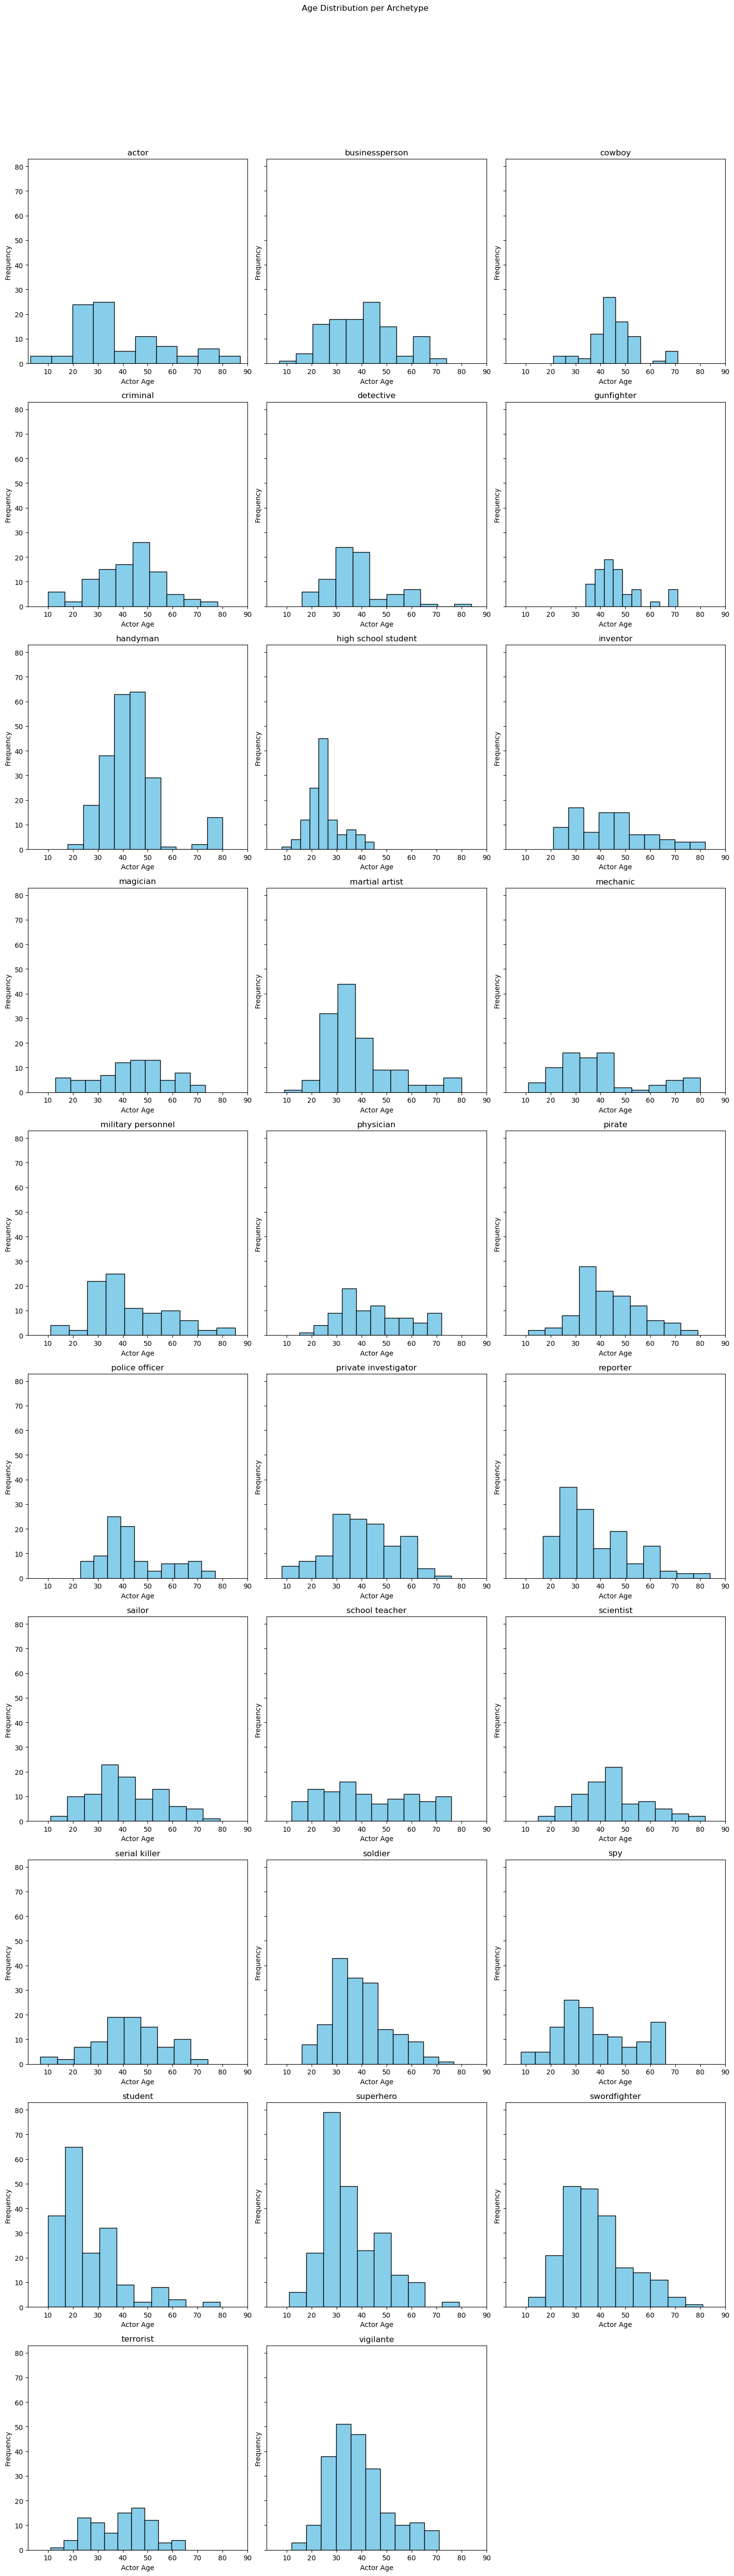

Age statistics:
Chi-square test statistic: 4045.5049115226216
p-value: 4.3663214469626865e-107
Degrees of freedom: 2240
There is a statistically significant age bias by archetype (reject null hypothesis).

Country of origin in different archetypes:


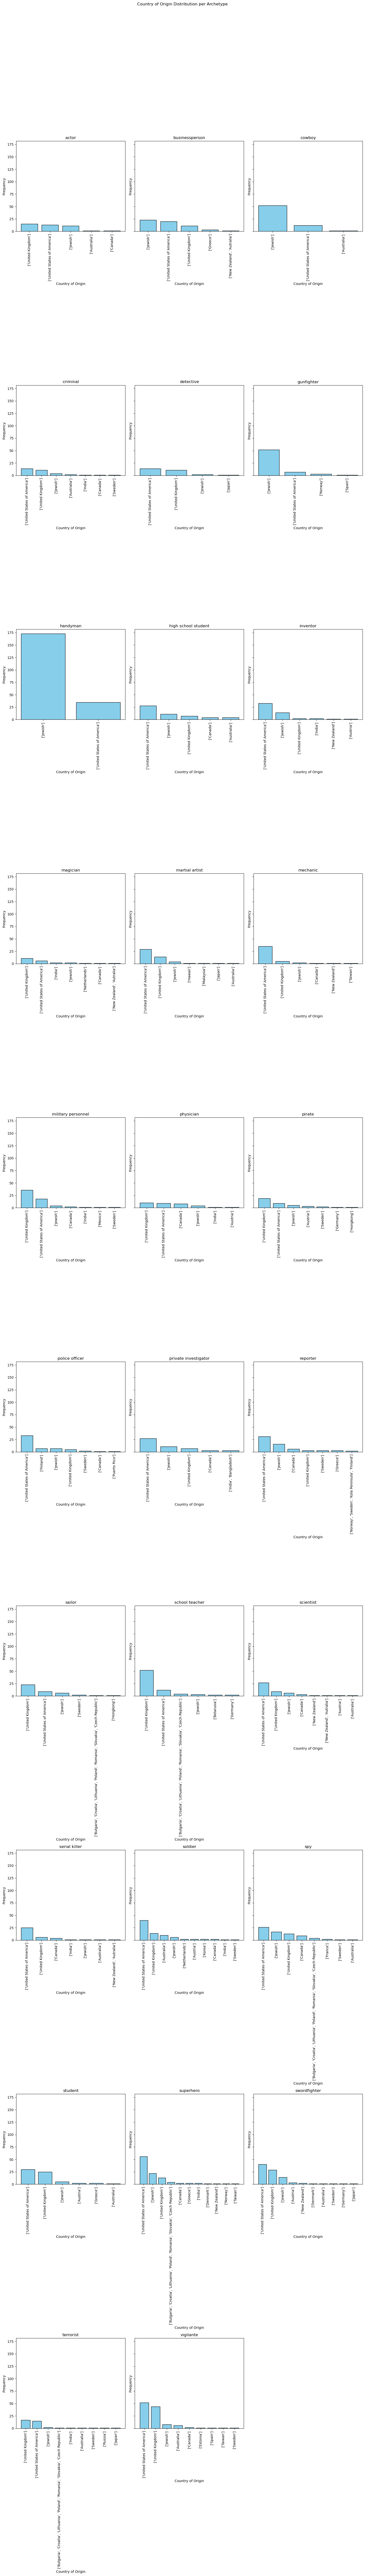

Country of origin statistics
Chi-square test statistic: 2504.016483800885
p-value: 2.7574988985221678e-158
Degrees of freedom: 868
There is a statistically significant country of origin by archetype (reject null hypothesis).

Ethnicity in different archetypes:


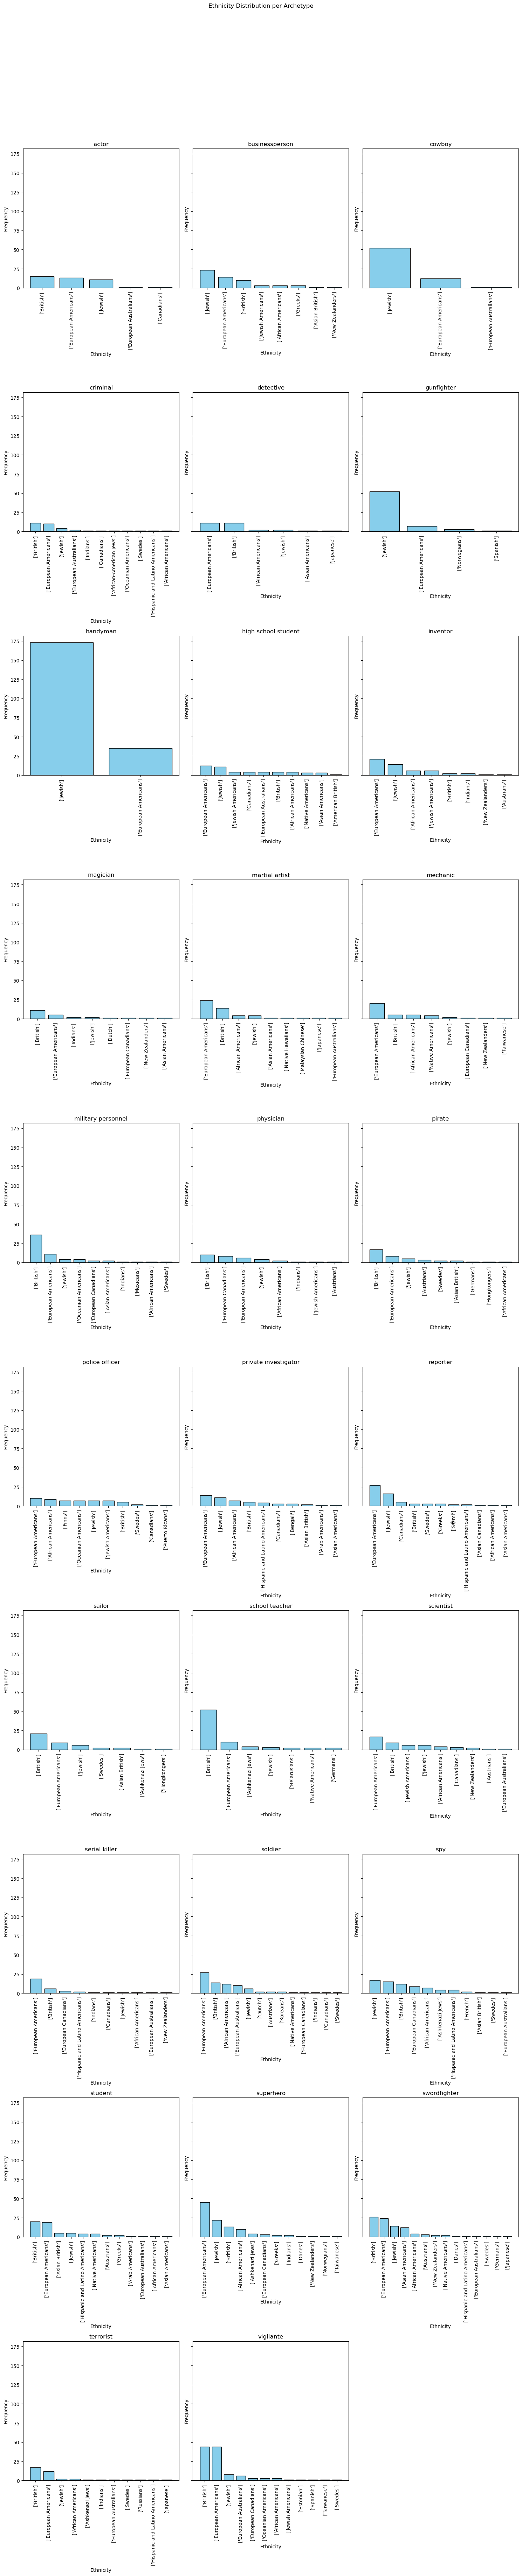

Ethnicity statistics
Chi-square test statistic: 3432.997235684602
p-value: 2.5598544497849235e-219
Degrees of freedom: 1176
There is a statistically significant ethnicity bias by archetype (reject null hypothesis).


In [5]:
import src.scripts.archetype_analysis

### 3. Diversity Score

In this section, we observe the diversity scores over time (averaged by year) and the average scores of each countries in order to find which are thetrends across time and space

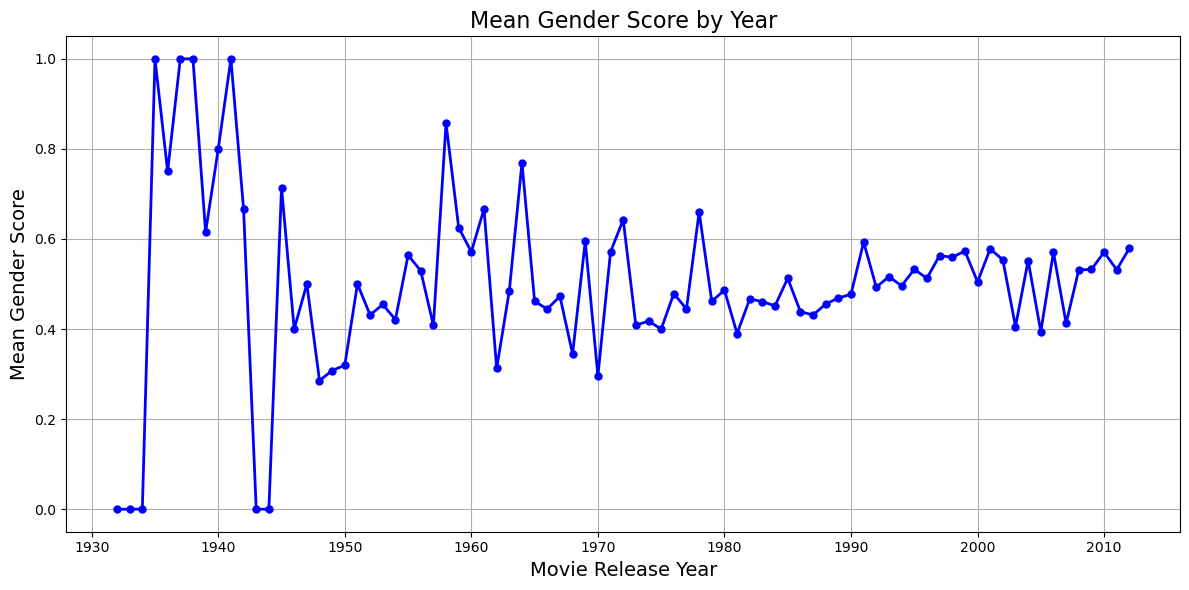

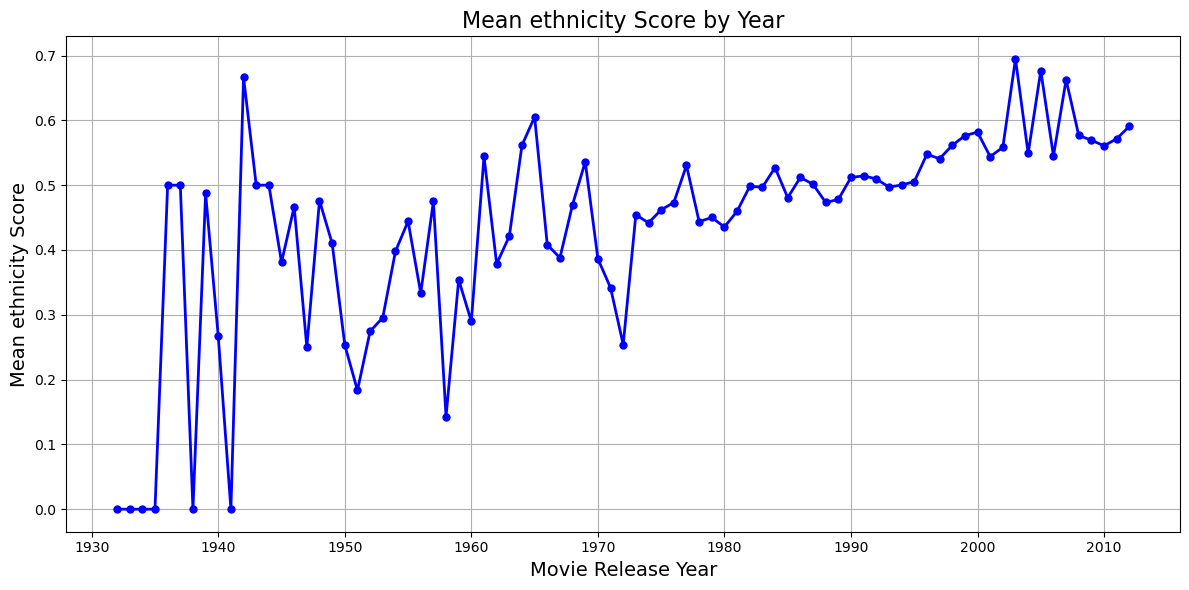

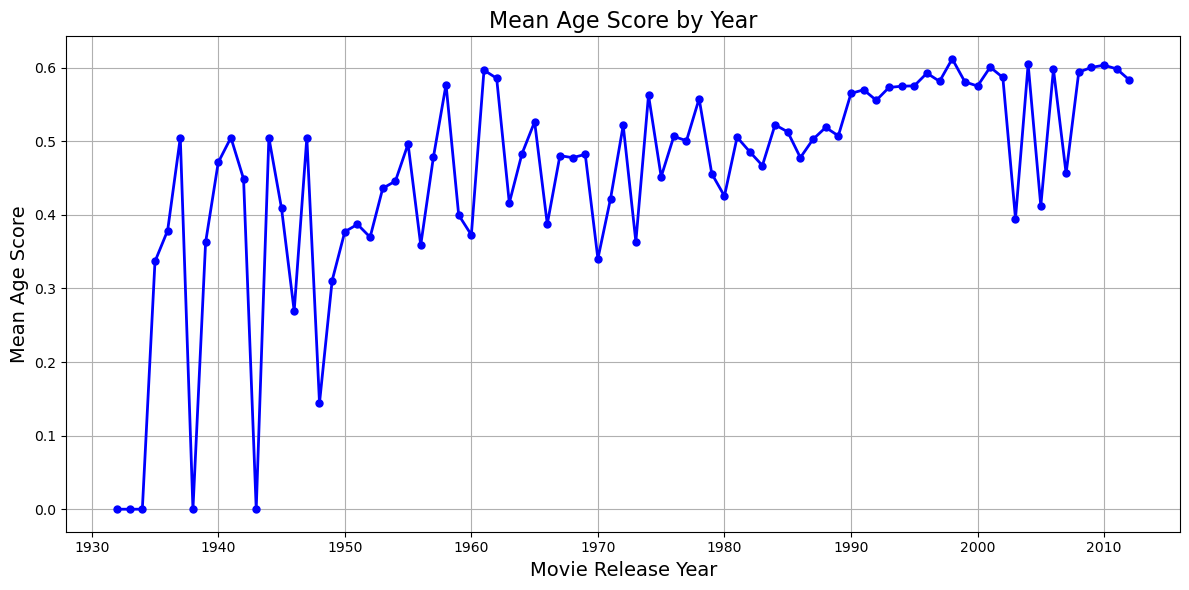

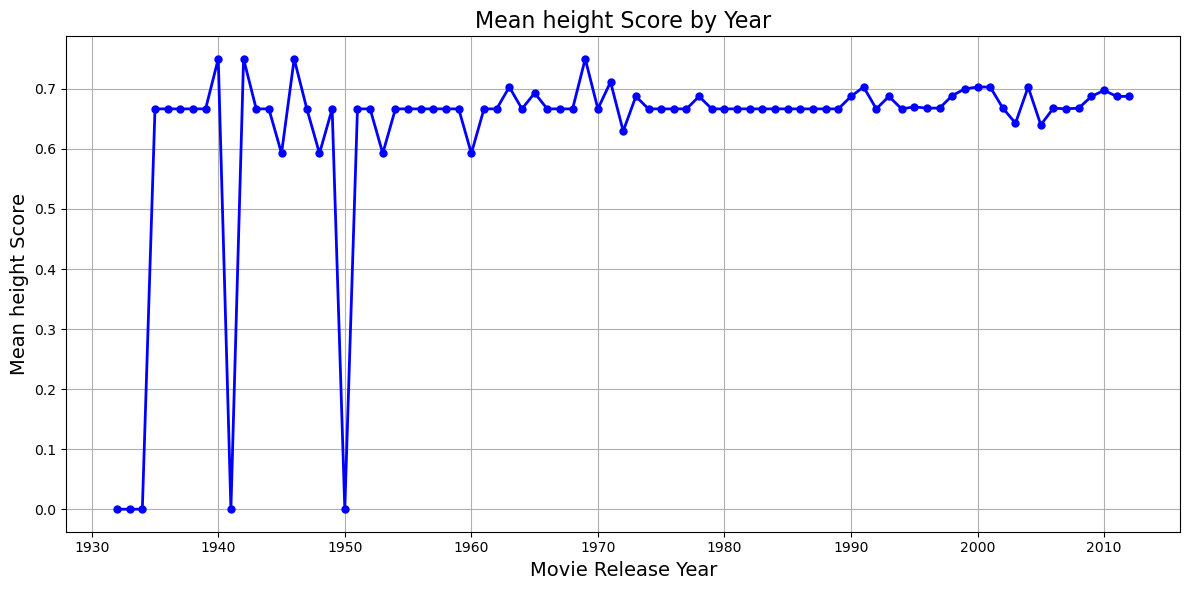

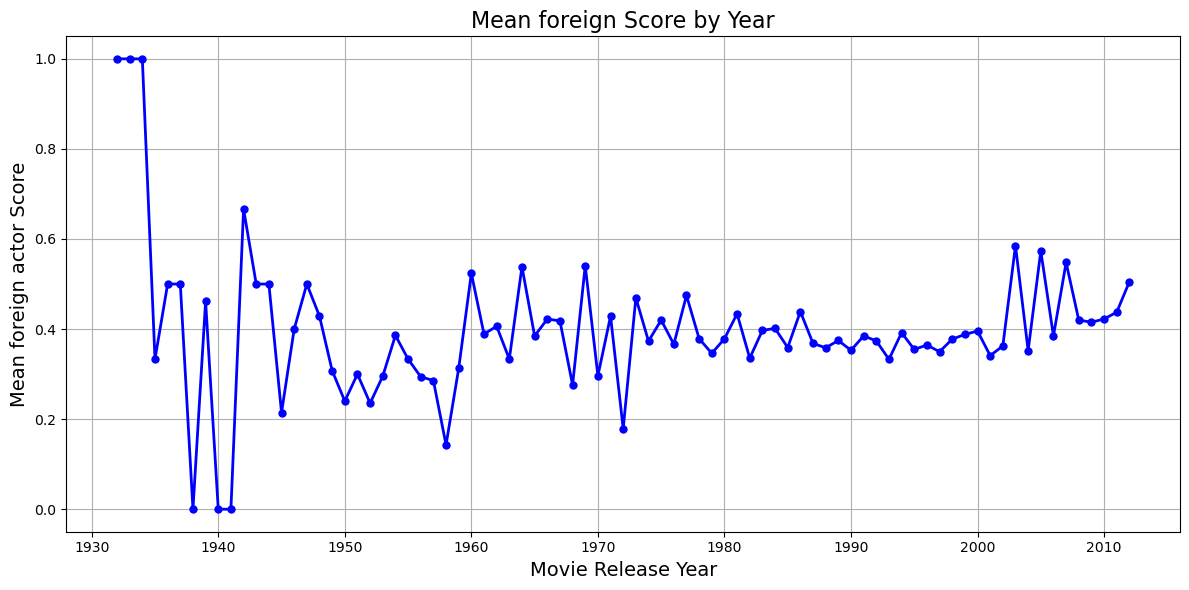

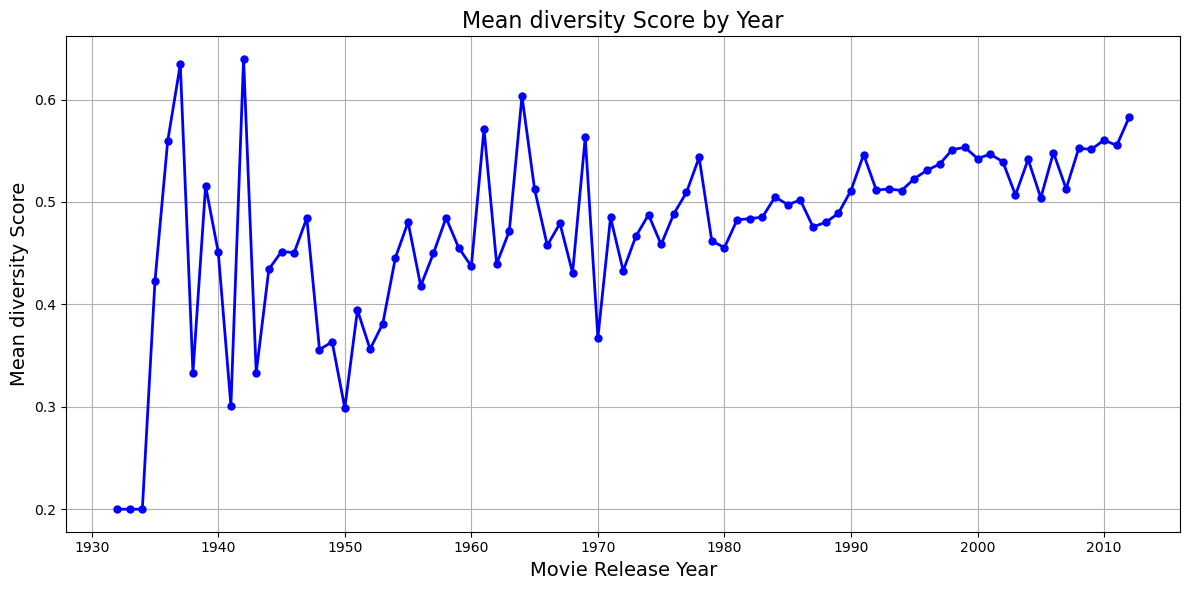

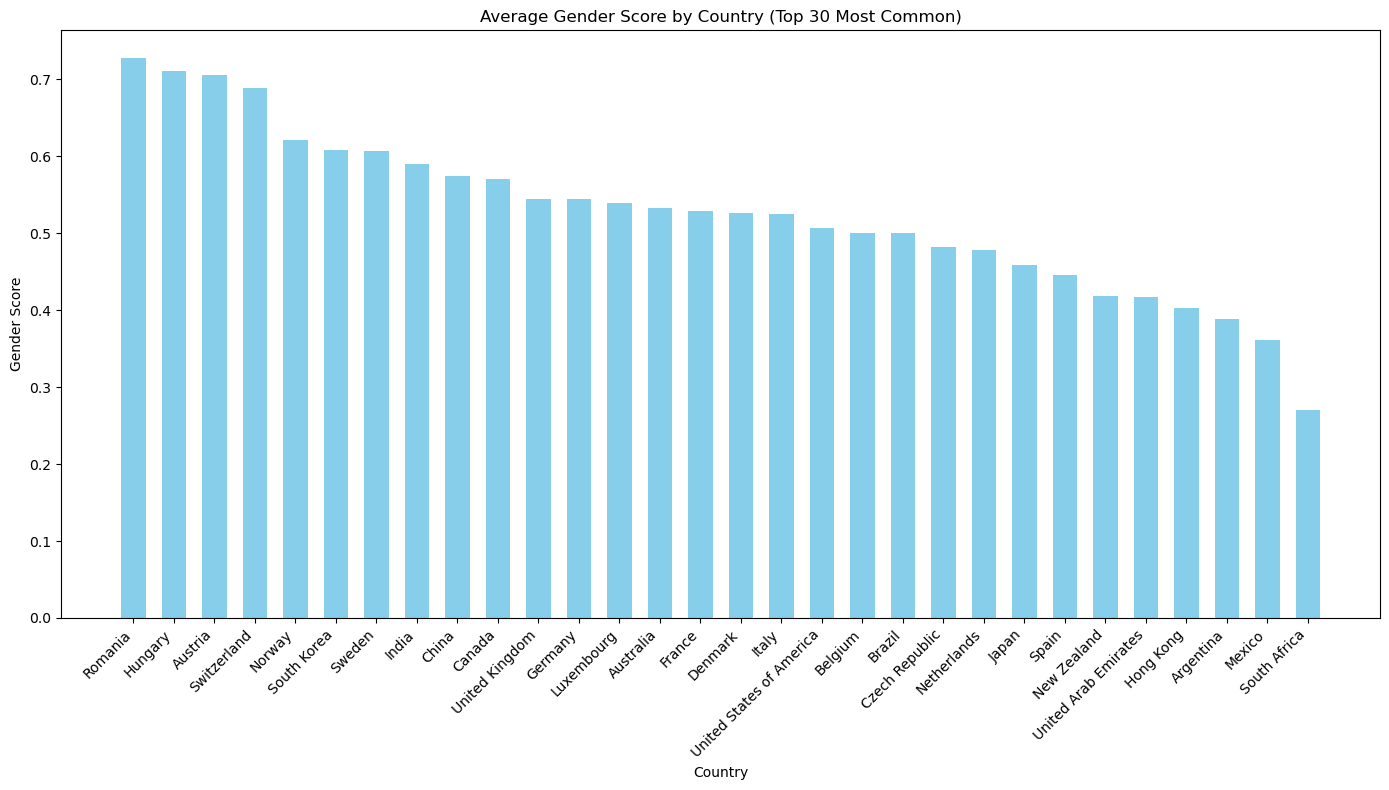

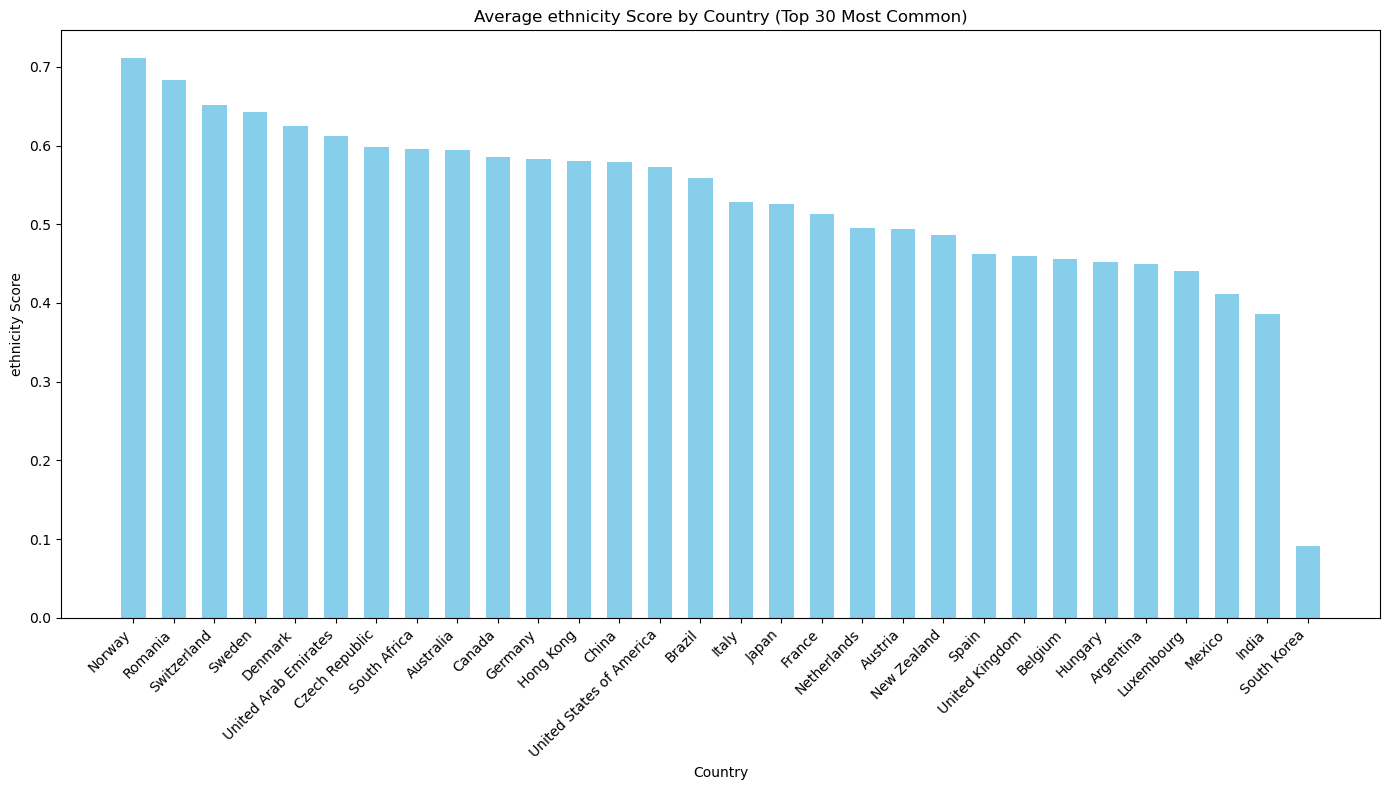

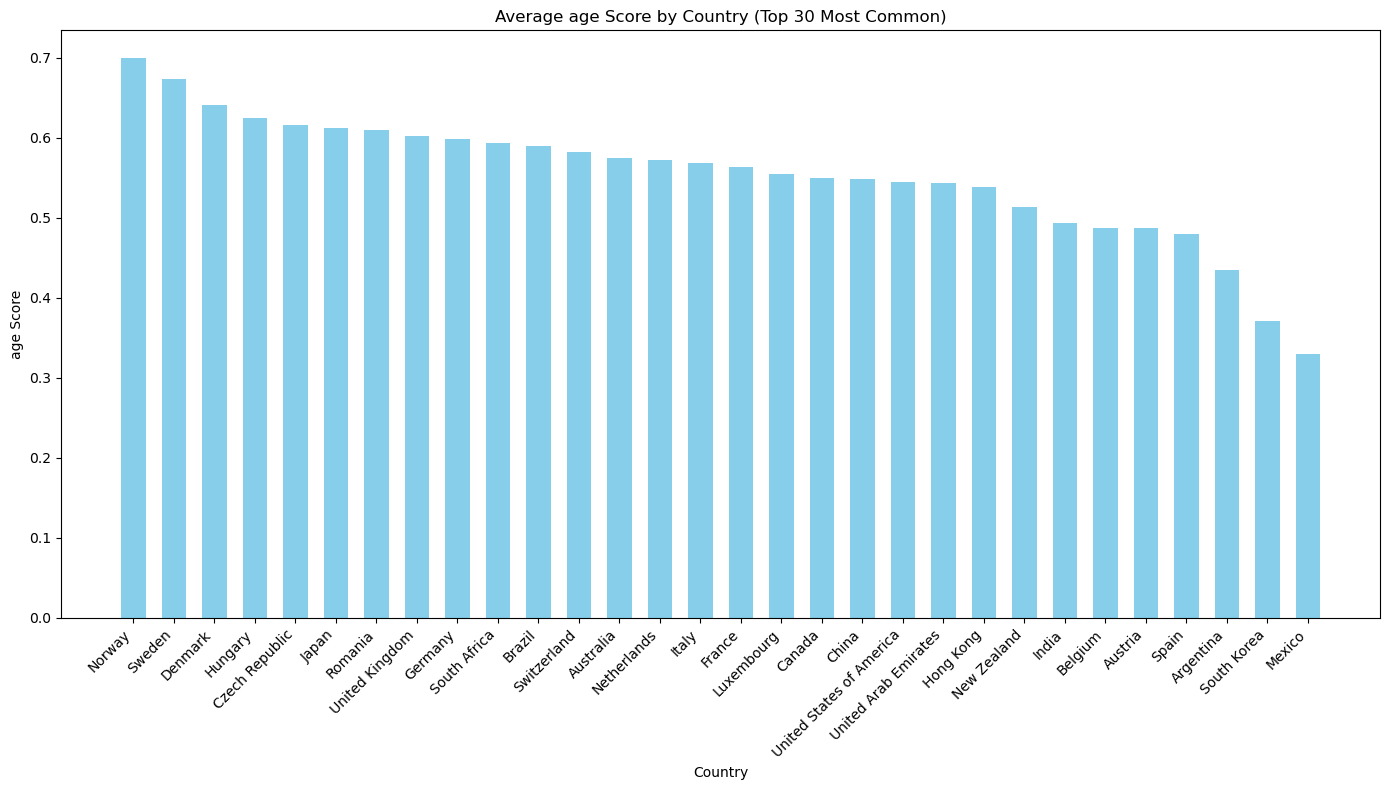

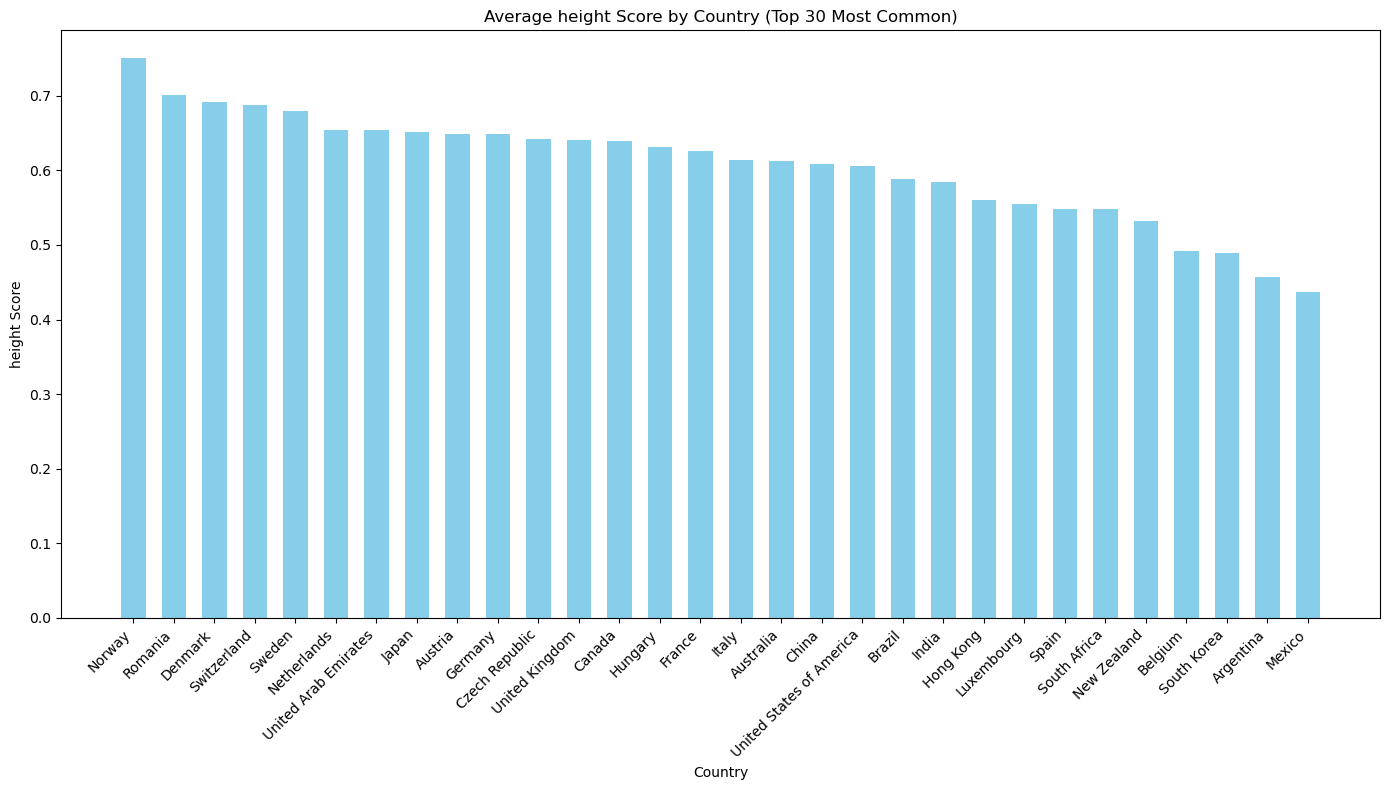

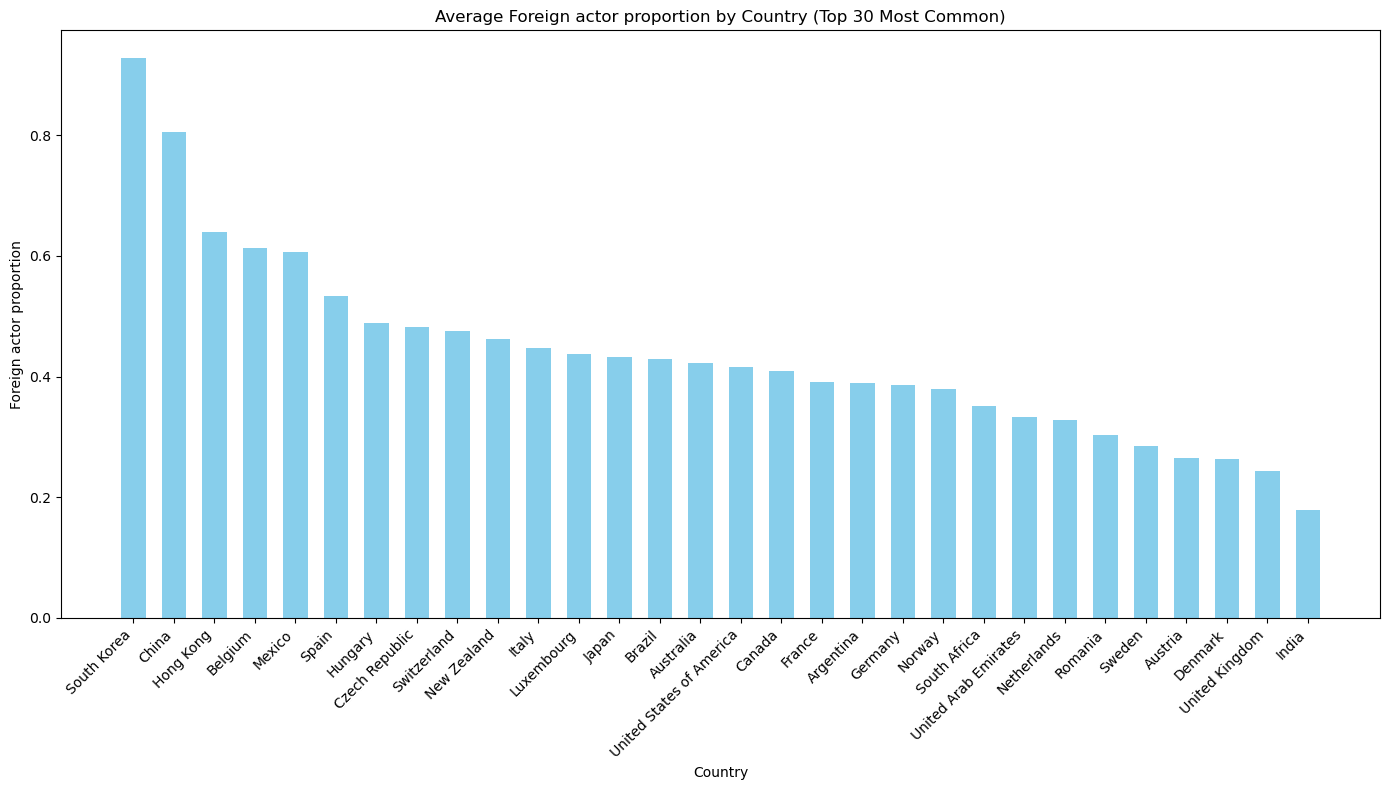

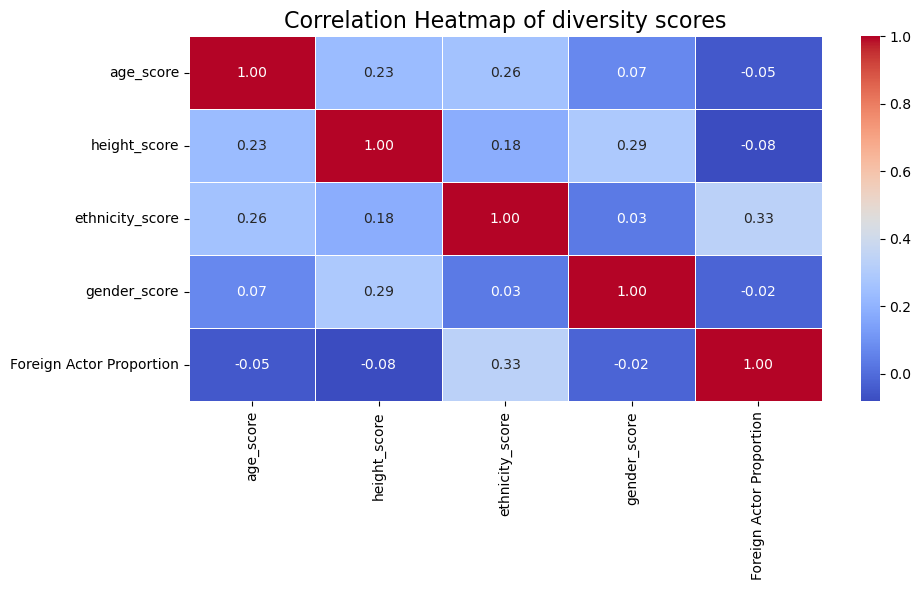

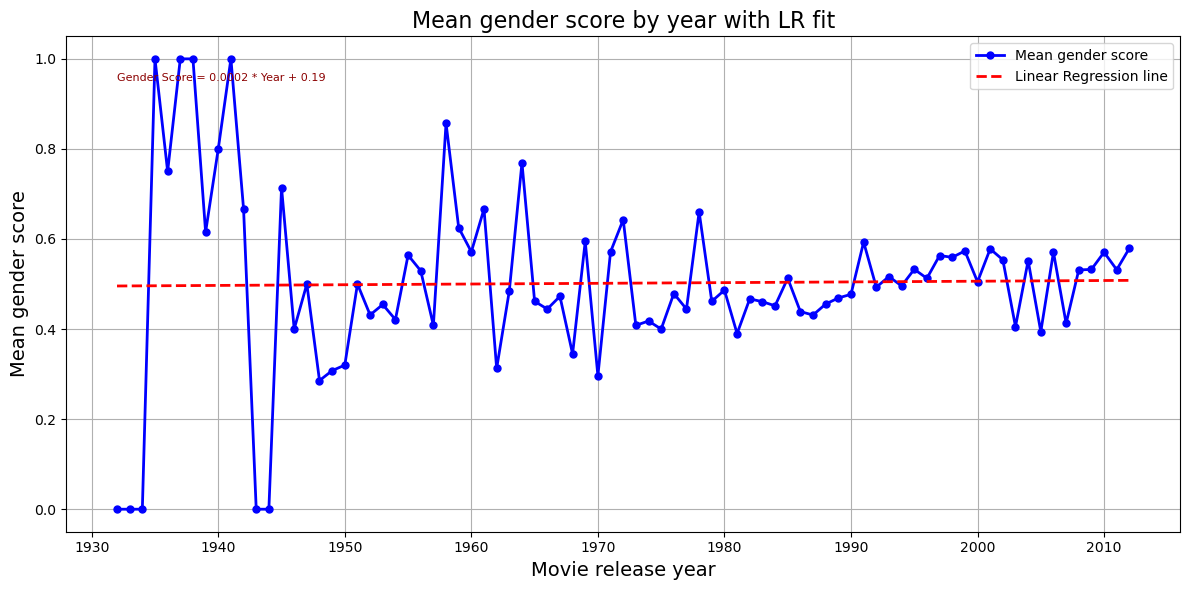

Linear regression coefficient: 0.00015581256841496087
Linear regression intercept: 0.1946214101717147


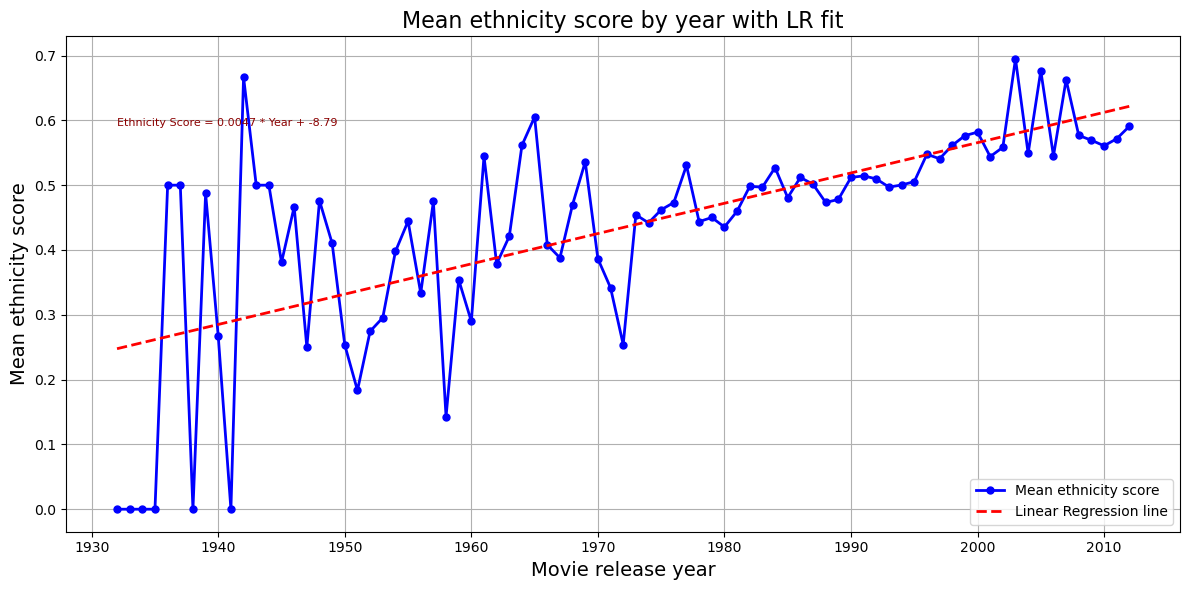

Linear regression coefficient: 0.004675479527826588
Linear regression intercept: -8.785368513644574


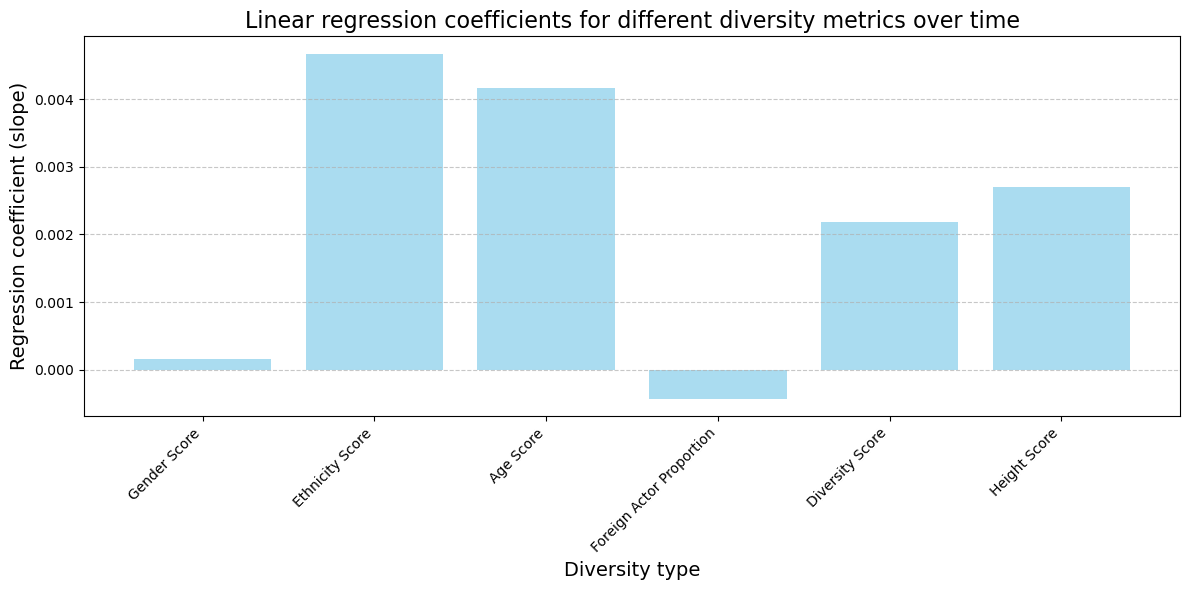

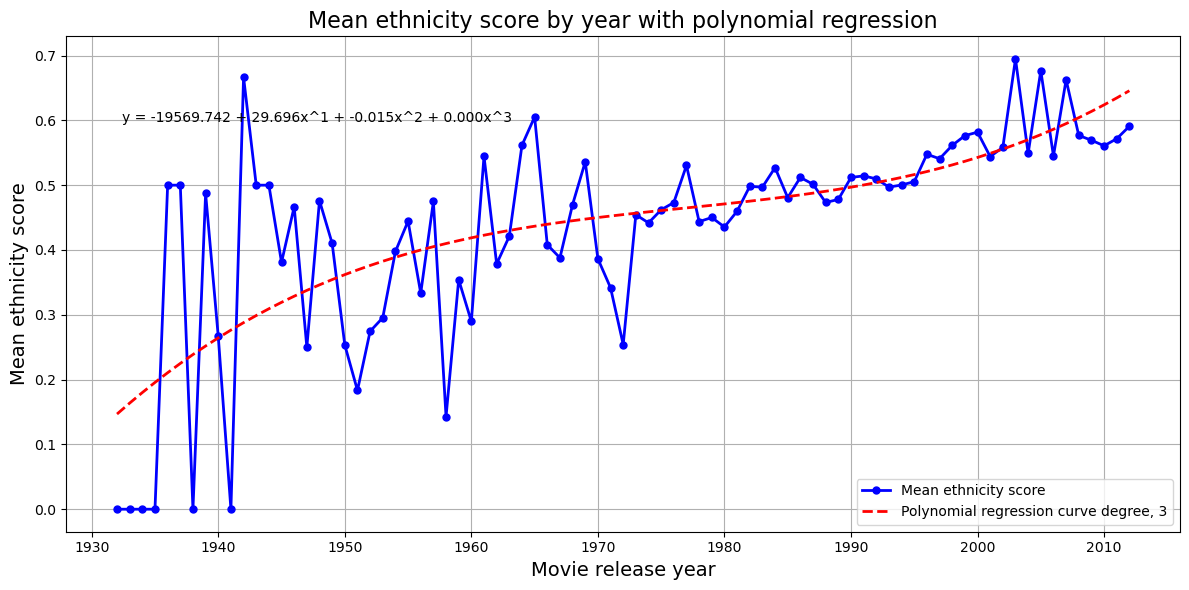

Polynomial regression coefficients: [ 0.00000000e+00  2.96958587e+01 -1.50211947e-02  2.53291832e-06]
Polynomial regression intercept: -19569.742374172736


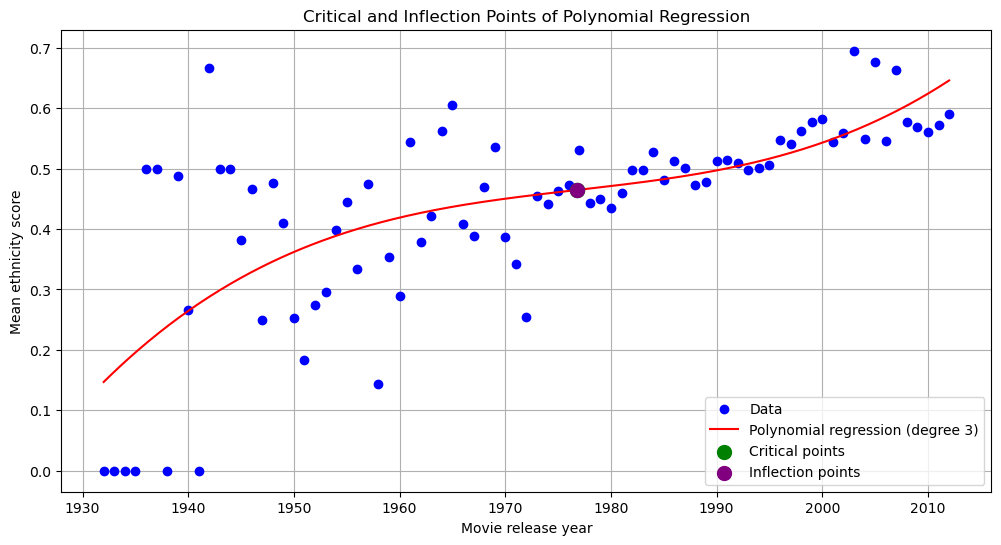

Critical Points (x values): [1976.79682585+16.25868553j 1976.79682585-16.25868553j]
Inflection Points (x values): [1976.79682585]


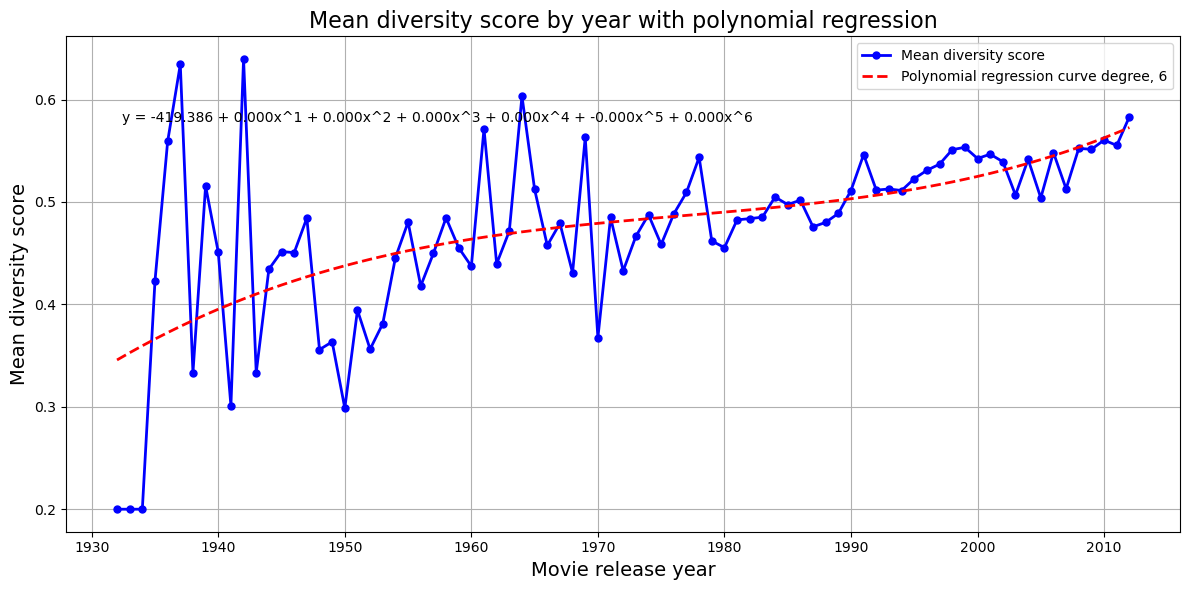

Polynomial regression coefficients: [ 0.00000000e+00  1.09113586e-15  3.17567073e-16  4.69661387e-13
  4.11634669e-10 -3.33080060e-13  7.01924055e-17]
Polynomial regression intercept: -419.38550614732935


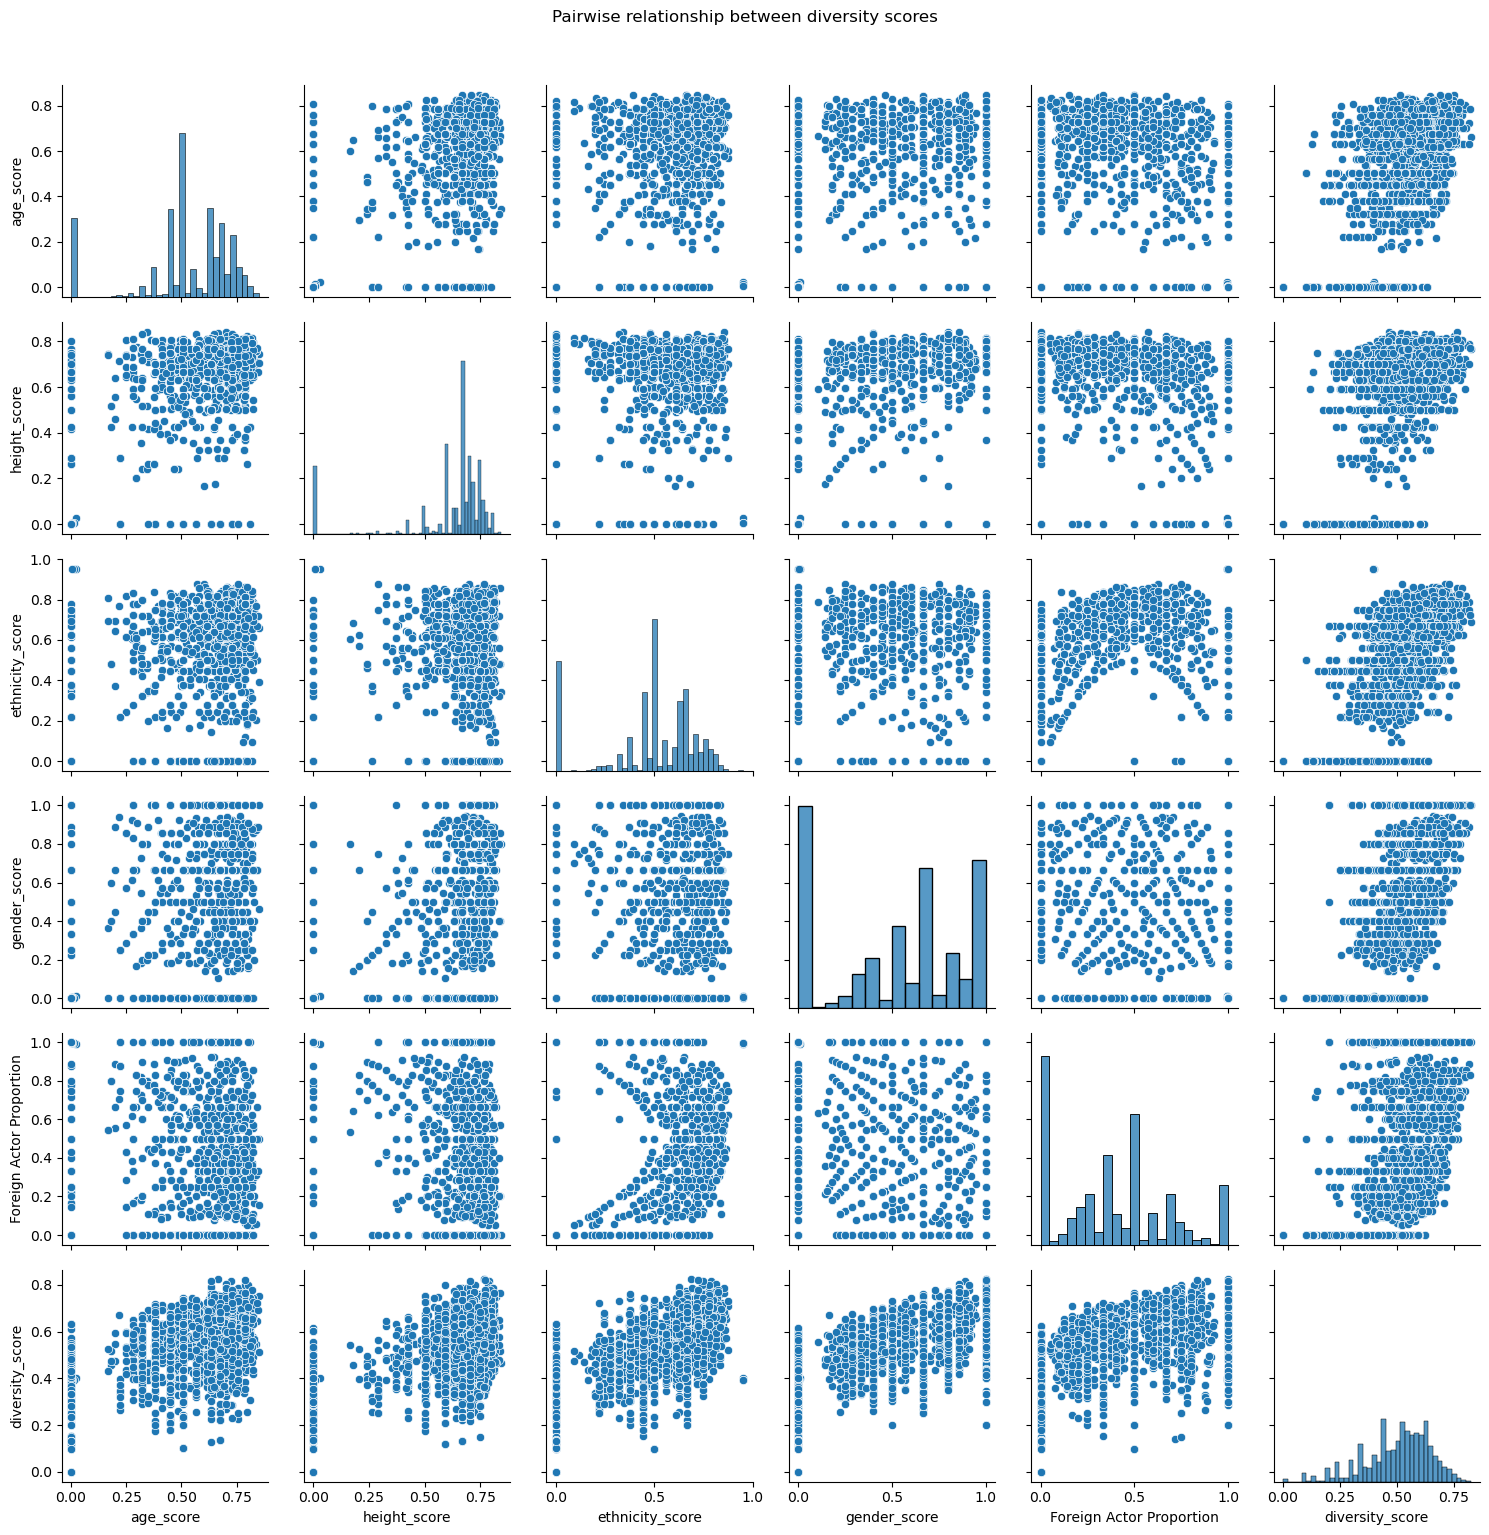

In [6]:
import src.scripts.plot_diversity_country_time

## Early Conclusion : 
We observed that the diversity scores in all categories have gone up since the 1940s except for the Foreign Actor Proportion.It seems that the cause of the linear regression in gender score being flat is due to low data in early movies.  We observed that various countries  have different average scores, and that some perform in certain categories. Some countries like UAE are very diverse ethnically, but less diverse gender wise while some countries like Austria have higher gender diversity but low ethnic diversity